# A explorative Analysis of [Mein Grundeinkommen e.V.](https://www.mein-grundeinkommen.de/)

## About the project and the people

### What is the project?

The general idea is to find out what changes in people if they have a financial buffer large enough to fulfill der basic existential needs. Do they become generally happier? Do they start to pursue their lifegoals more? Do they maybe just enjoy the money and do nothing? <br>
It is a project to go beyond discussion and "what if" to experiment in reality and gather the facts by providing a crowdfounded unconditional basic income to people that were chosen in a raffle.

### What is "Mein Grundeinkommen"?

The project currently defines the unconditional basic income (in the following as UBI) as a sum of $1,000€$ a month over a year, so $12,000€$ in total, paid into the recipients bank account. As it is unconditional everyone that joins the project has a chance to receive a UBI, no matter their gender, nationality, income or their plans on how to use the money. There are other ideas of basic incomes floating around in german politics, mainly proposed by the SPD, which are framed similar but are not unconditional. It is important to differentiate between those ideas and this truly unconditional basic income. <br>
The only condition is to join the platform and the raffles.
The UBI itself is donation based, though a donation is not required for participation.

### Who is Mein Grundeinkommen e.V.?

Mein Grundeinkommen e.V. is a Berlin based ["non-profit organization that crowdfunds and raffles off unconditional basic incomes of 1.000,- € a month"](https://www.mein-grundeinkommen.de/infos/in-english). They were founded 2014 by a first crowdfunding campaign and are now of the biggest UBI profiding projects in the world. Currently they consist of about 30 people. These people made it their job to promote the concept of the UBI in hope of it becoming a more mainstream idea. They built up the growing platform [mein-grundeinkommen.de](https://www.mein-grundeinkommen.de) to provide crowdfounded basic incomes and already wrote a book about the recipients experiences.
They finance themselfes also through crowdfunding as every donor can choose how much of their donation will be used to provide a UBI and how much supports the organization. 

## The Dataset

The database I worked with is a PostgreSQL database dump which the nice people at Mein Grundeinkommen e.V. (in the following as MeinBGE) provided me with. Because this is not a public database all personal information was removed beforehand (excluding non sensitive data such as birthdays). 

Using [psycog2](https://pypi.org/project/psycopg2/) I wrote the necessary queries to do a bit of Data Wrangling with [pandas](https://pandas.pydata.org/) and [numpy](https://numpy.org/). Afterwards I exported the data to CSV files to use in the notebook. Here I used [matplotlib](https://matplotlib.org/), [seaborn](https://seaborn.pydata.org/) and pandas for plotting and [scikit-learn](https://scikit-learn.org/) for regression.

Text:
- was sind das für Daten? (nicht öffentlich, etc)
- Was mache ich mit den Daten?
- Welche mittel/module nutze ich?

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [20]:
# load datasets
overview = pd.read_csv('data/general_overview.csv', index_col=0)
age_distribution = pd.read_csv('data/age_distribution.csv')
user_sign_up = pd.read_csv('data/user_sign_up.csv', index_col=0)
data_CH_monthly = pd.read_csv('data/data_CH_monthly.csv', index_col=0)
ch_sign_up = pd.read_csv('data/ch_sign_up.csv', index_col=0)
data_donation_monthly = pd.read_csv('data/data_donation_monthly.csv', index_col=0)
data_donation_monthly = pd.read_csv('data/data_donation_monthly.csv', index_col=0)
data_donation_value = pd.read_csv('data/data_donation_value.csv', index_col=0)
raffles_over_time = pd.read_csv('data/raffles_over_time.csv', index_col=0)
duration_til_mandate = pd.read_csv('data/duration_til_mandate.csv')
raffles_before_ch = pd.read_csv('data/raffles_before_ch.csv', index_col=0)

## Explorative Analysis

### Overview

To get an overview of some key numbers I aggregated a few values.

In [21]:
overview

,value
info,
Adults users,1338040
Child users,225771
Amount Crowdhörnchen,120218
Total amount raffles,52
Adult recipients,376
Child recipients,68
Sum basic incomes [€],5328000


There are to this date $1,338,040$ adults and $225,771$ children from which $120,218$ users are Crowdhörnchen (donors with monthly debit mandate).<br>
These people have now donated $5,328,000€$ for basic incomes which led to $444$ UBIs distributed over $52$ raffles since <i>Startdatum</i>. <br>
In the last years $376$ adult users and $68$ children received a monthly $1,000€$ for a year.

### Getting to know the users


First of all I tried to get to know the people who are the MeinBGE userbase.

#### General Questions

- Where are the people who joined the MeinBGE platform from? 

When signing up for MeinBGE people can give their regional zipcode (PLZ) if they want to. Fortunately a lot of the users did so ($1,121,254$ in total).<br> 
Using these zipcodes and data openly available at https://www.suche-postleitzahl.org/downloads (for example shp-files for the zipcodes and the amount of people per zipcode) and the geopandas module I can create map of Germany and map the percentage of users in the population of each zipcode.

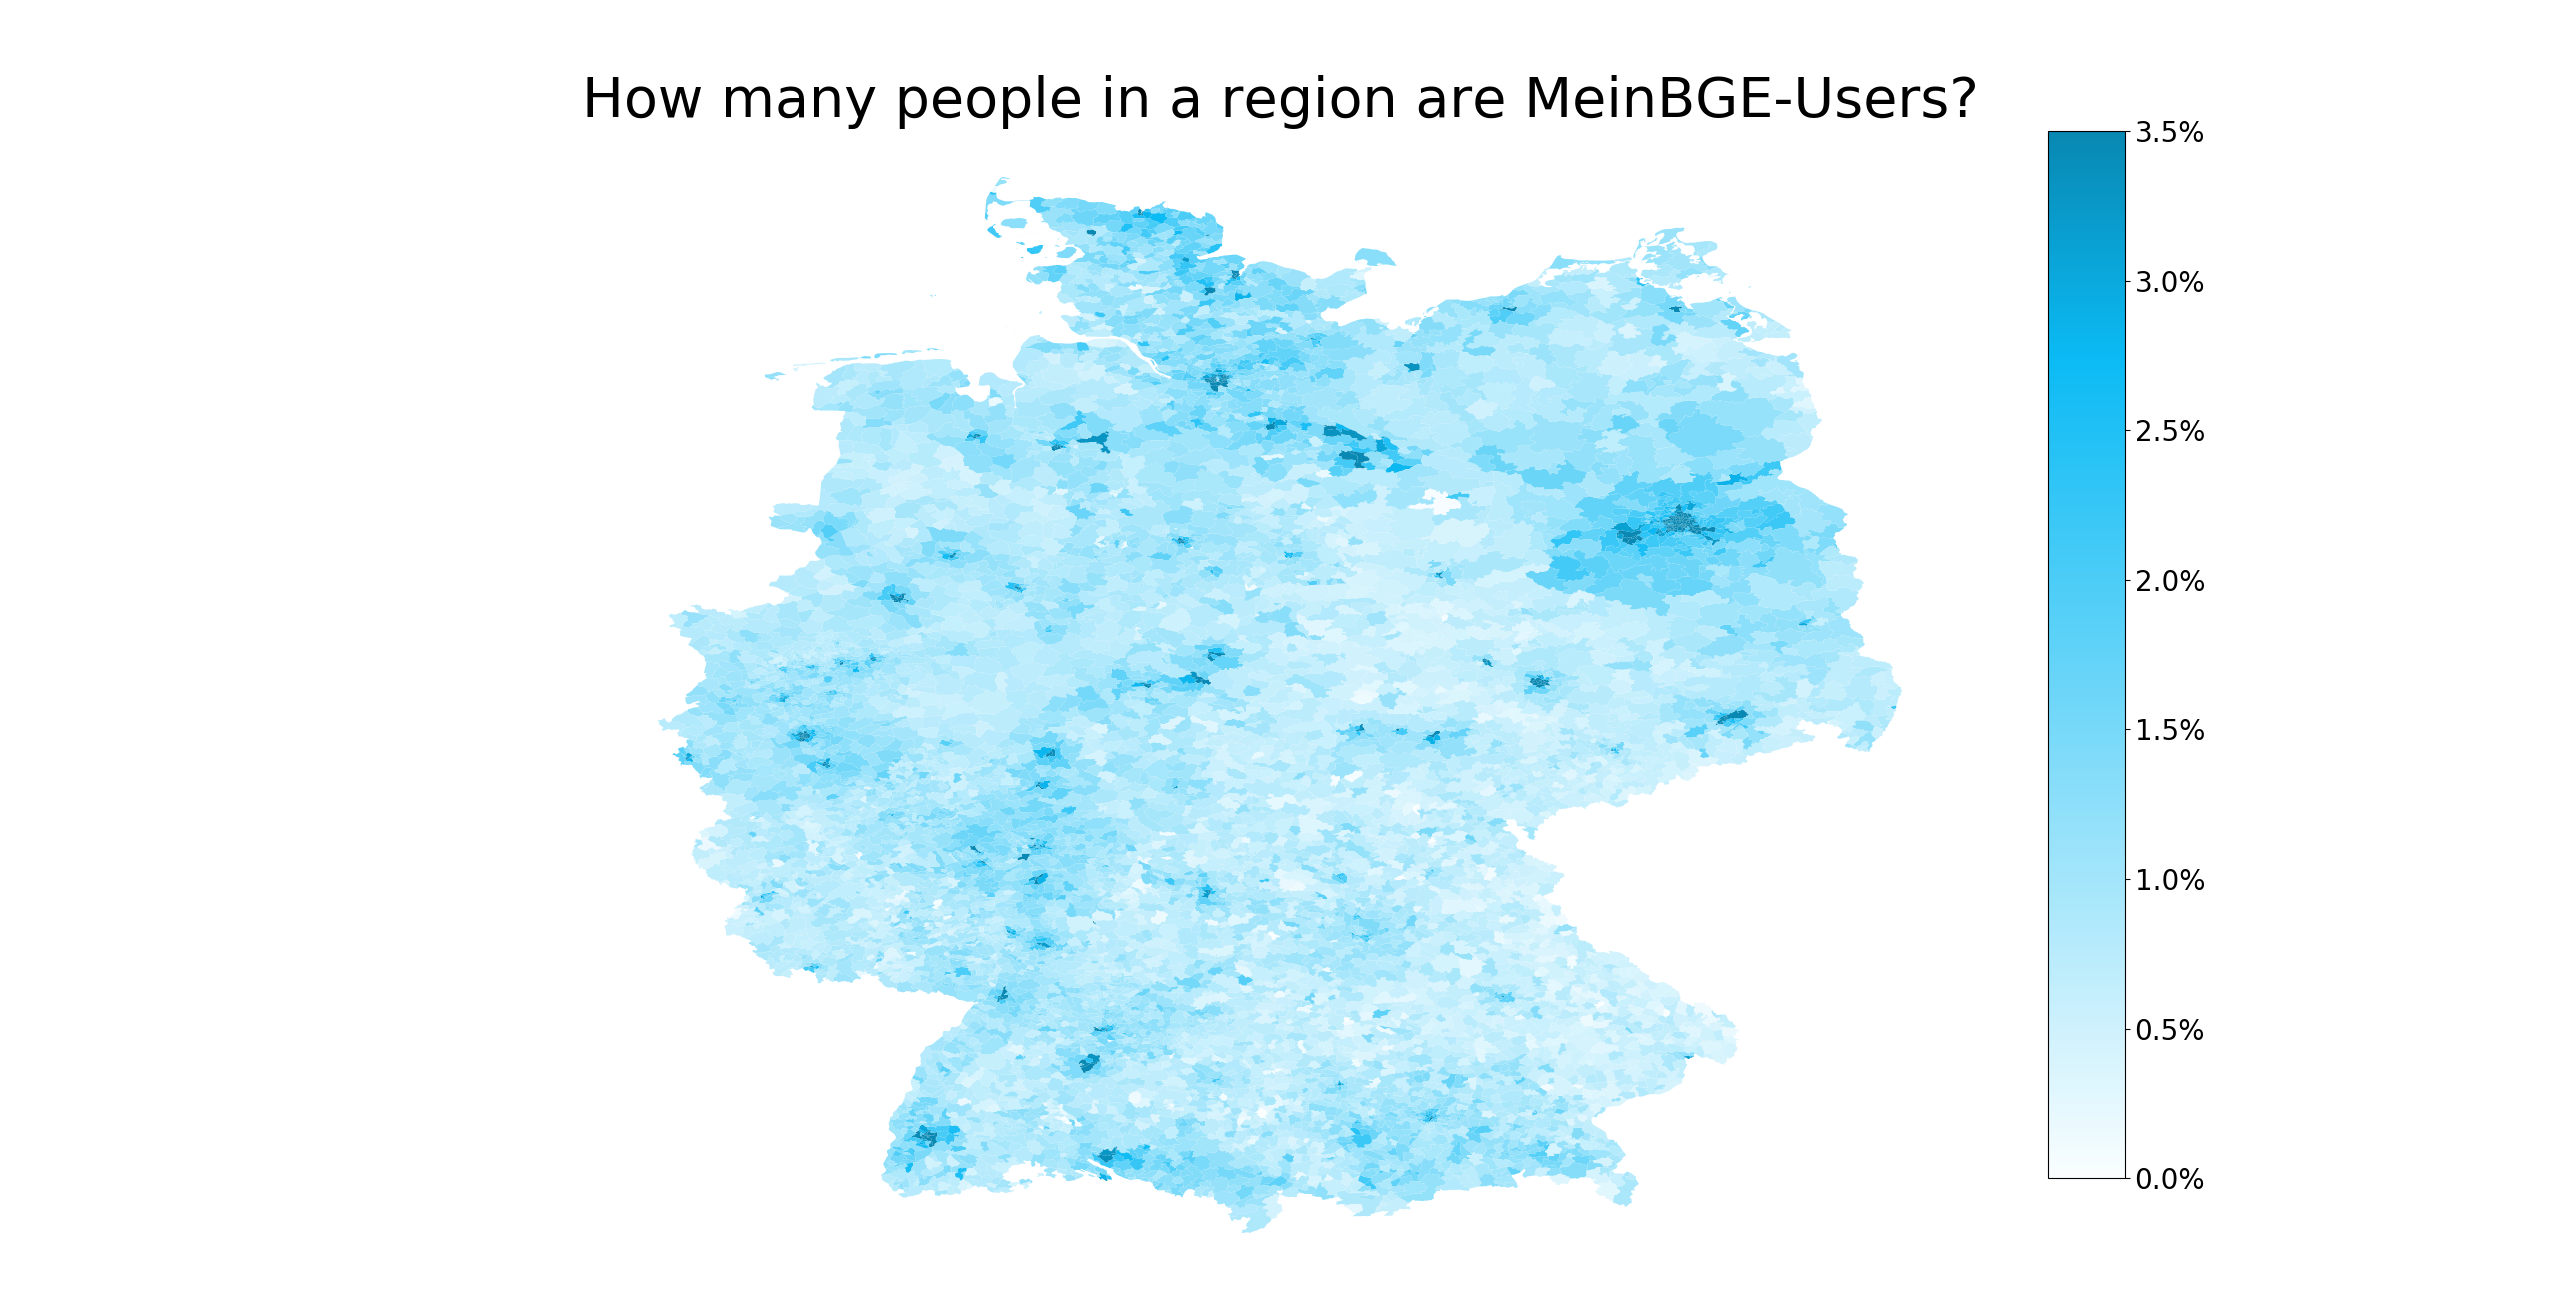

This map shows that in the urban regions like Bremen, Dresden, Leipzig or Freiburg and most of all the area Berlin and Potsdam, the basic income experiment is more popular than in the more rural areas of Germany. 
<i>Gründe?</i>

- How old are the users typically?

While signing up for an account at MeinBGE one is not required to fill in their birthday. Nevertheless it is a requirement for participation in the raffles as a means of security and confirmation. 
Using the birthdays of all those users gives the following age distribution. 

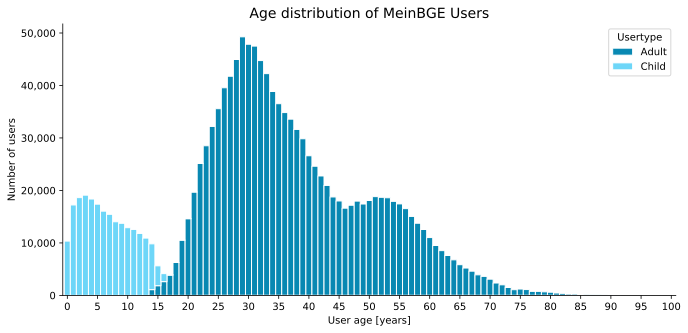

In [4]:
%config InlineBackend.figure_format = 'svg'

fig = plt.figure(figsize=(11,5))

ax = plt.gca()
age_distribution.plot.bar(x='age', y=['num_age_user', 'num_age_child'], stacked=True, rot=0,
                          width=1, edgecolor='white', color=['#0888b2', '#6dd6f8'],
                          ax=ax)
sns.despine(ax=ax, top=True, right=True)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.set_xticklabels(ax.get_xticks().astype(int))

ax.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel('Number of users')
ax.set_xlabel('User age [years]')
ax.set_title('Age distribution of MeinBGE Users', size=14)
ax.legend(['Adult', 'Child'], title='Usertype')
plt.show()

This graph seems to show two distributions for adults. There is one with a peak at 29 and a second with its peak at 52. <i>Gründe?</i> This plot also shows many children (most of which are at the age of 5 and under) for whom their legal guardian has made a account. 

#### Development over time

Although MeinBGE is not a Start Up and has no investors to answer to except their userbase, the goal is to make the concept of the universal basic income more popular and thus to grow. <br>

- When do users sign up? How much of them leave?

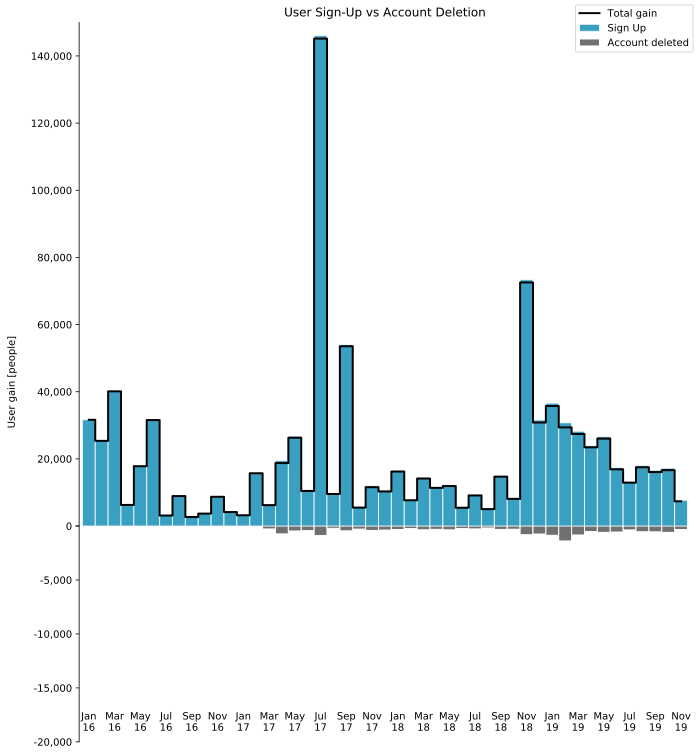

In [32]:
%config InlineBackend.figure_format = 'svg'

fig = plt.figure(figsize=(10,10))

ax = fig.add_axes([0.15, 0.3, 0.85, 0.7])
ax2 = fig.add_axes([0.15, 0, 0.85, 0.3])

user_sign_up[['acc_created', 'acc_deleted']].sum(axis=1).plot(drawstyle='steps-mid', color=['black'],
                                                       linewidth=2, ax=ax)
user_sign_up['acc_created'].plot(kind='bar', rot=0, width=1, edgecolor='white', color=['#0888b2'], alpha=0.8, ax=ax)
user_sign_up['acc_deleted'].plot(kind='bar', rot=0, width=1, edgecolor='white', color=['#707070'], ax=ax2)

sns.despine(ax=ax, top=True, bottom=True, right=True)
sns.despine(ax=ax2, top=True, bottom=True, right=True)

ax.set_ylim([0, 150000])
ax2.set_ylim([-20000, 0])
plt.setp(ax.get_yticklabels()[0], visible=False)
ax.set_xticklabels([])
plt.setp(ax2.get_xticklabels()[1::2], visible=False)
ax2.tick_params(axis='x', pad=-30, length=0)

ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax2.yaxis.set_major_locator(ticker.MultipleLocator(5000))
ax2.set_yticklabels(ax2.get_yticks().astype(int))
ax2.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.set_title('User Sign-Up vs Account Deletion')
fig.text(x=0.05, y=0.5, s='User gain [people]', rotation=90, va='center')
fig.legend(['Total gain', 'Sign Up', 'Account deleted'], loc=('upper right'))

plt.show()

As this plot shows there usually is no significant loss of users. 
Einbauen:
- Mein Grundeinkommen bei "Mensch Gottschalk" 28.05.2017
- Gönnt euch Grundeinkommen! 27.07.2017 Freunde einladen feature Tandem
- 100 Grundeinkommen 24.07.2017
- Gönnt euch Grundeinkommen! 27.09.2017 Freunde einladen feature Tandem
- Grundeinkommen #FürAlle 01.11.2018 Tandem
- Unser Auftritt bei Anne Will 25.11.2018
- Wir haben ein Buch geschrieben 25.01.2019

- How many Crowdhörnchen are there?

All those people, that donate monthly to MeinBGE are affectionally called <i>Crowdhörnchen</i>. Over the last years the number of these Crowdhörnchen has steadily risen, which makes more and more basic incomes possible. The following graph shows the growth rate of the total number of Crowdhörnchen per month. This data consists of all debit mandates sent to the donors banks. Bounced mandates have not been taken into account, because those are not included into the database. <br>
To calculate a growth rate I use linear regression (see the high standard coefficient).

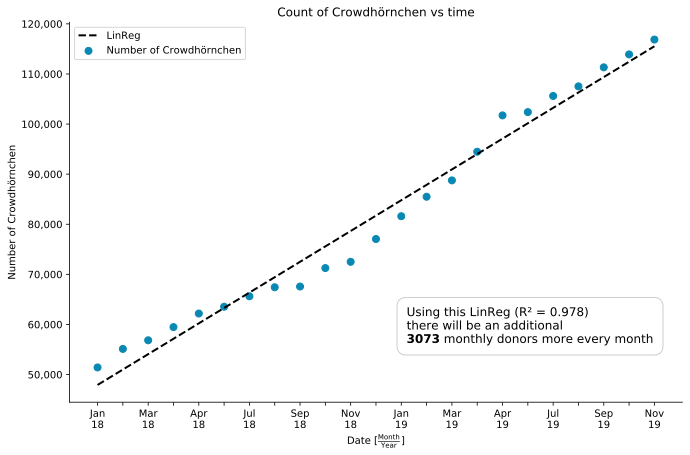

In [6]:
%config InlineBackend.figure_format = 'svg'

reg = LinearRegression().fit(np.array(data_CH_monthly.index).reshape(-1, 1), data_CH_monthly['count'])
score = reg.score(np.array(data_CH_monthly.index).reshape(-1, 1), data_CH_monthly['count'])
prediction = reg.predict(np.array(data_CH_monthly.index).reshape(-1, 1))

fig, ax = plt.subplots(figsize=(11,7))

plt.scatter(range(len(data_CH_monthly['date_trunc'])), data_CH_monthly['count'],
            color='#0888b2', s=50, label='Number of Crowdhörnchen')
plt.plot(range(len(data_CH_monthly['date_trunc'])), prediction,
         color='black', linewidth=2, linestyle='--', label='LinReg')
ax.set_xticks(range(len(data_CH_monthly['date_trunc'])))
ax.set_xticklabels(data_CH_monthly['date_trunc'])
plt.setp(ax.get_xticklabels()[1::2], visible=False)
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_title('Count of Crowdhörnchen vs time')
ax.set_ylabel('Number of Crowdhörnchen')
ax.set_xlabel('Date ' + r'[$\frac{\mathrm{Month}}{\mathrm{Year}}$]')
sns.despine(ax=ax, top=True, right=True)
ax.legend()
ax.annotate(xy=(0.55, 0.2), xycoords='axes fraction', ha='left', va='center',
            s='Using this LinReg (R\u00b2 = {0:.3f})\n' 
            'there will be an additional\n'
            r'$\mathbf{{{1:.0f}}}$ '
            'monthly donors more every month'.format(score,reg.coef_[0]), size=12,
            bbox=dict(facecolor='white', edgecolor='black', alpha=0.2, boxstyle='round,pad=0.8'))
plt.show()



As displayed, there are more than $3000$ new donors every month since january 2018.
pro monat etwas mehr als 3000 zusätzliche monatliche spender, als churn angeben

- What does this growth rate mean? What does it consist of? 

This data shows the absolute values of debits per month. Naturally there are people that do not want to or cannot donate anymore, so a loss of donors is to be expected. The next plot shows the number of newly created and the revoked debit mandates, as well as their total.

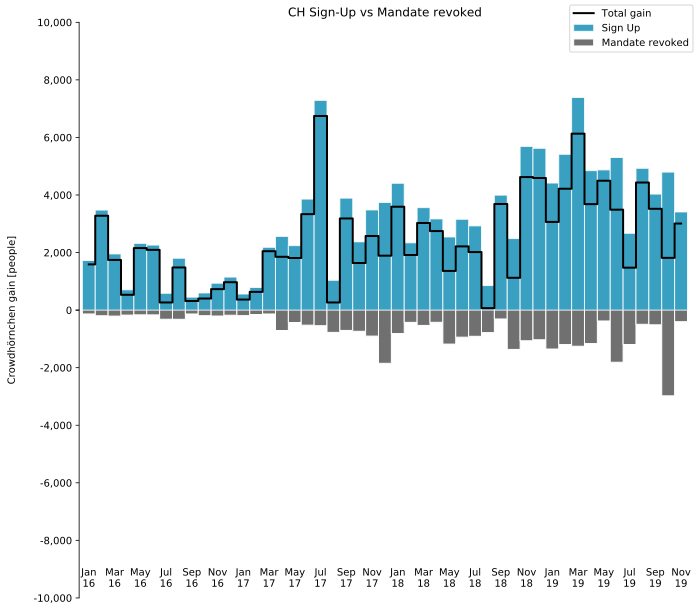

In [29]:
%config InlineBackend.figure_format = 'svg'

fig = plt.figure(figsize=(10,8))

ax = fig.add_axes([0.15, 0.5, 0.85, 0.5])
ax2 = fig.add_axes([0.15, 0.0, 0.85, 0.5])
sns.despine(ax=ax, top=True, bottom=True, right=True)
sns.despine(ax=ax2, top=True, bottom=True, right=True)


(ch_sign_up['created_at'] + ch_sign_up['revoked_at']).plot(drawstyle='steps-mid', color=['black'],
                                                     linewidth=2, ax=ax)
ch_sign_up['created_at'].plot(kind='bar', rot=0, width=1, edgecolor='white', color=['#0888b2'], alpha=0.8, ax=ax)
ch_sign_up['revoked_at'].plot(kind='bar', rot=0, width=1, edgecolor='white', color=['#707070'], ax=ax2)

ax.set_ylim([0, 10000])
ax2.set_ylim([-10000, 0])
plt.setp(ax.get_yticklabels()[0], visible=False)
ax.set_xticklabels([])
plt.setp(ax2.get_xticklabels()[1::2], visible=False)
ax2.tick_params(axis='x', pad=-30, length=0)

ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.set_title('CH Sign-Up vs Mandate revoked')
fig.text(x=0.05, y=0.5, s='Crowdhörnchen gain [people]', rotation=90, va='center')
fig.legend(['Total gain', 'Sign Up', 'Mandate revoked'], loc=('upper right'))

plt.show()

- Gains erklären an events
- ab 2018 betrachten für Konsistenz? <br>
Events
- Mein Grundeinkommen bei "Mensch Gottschalk" 28.05.2017
- Gönnt euch Grundeinkommen! 27.07.2017 Freunde einladen feature Tandem
- 100 Grundeinkommen 24.07.2017
- Gönnt euch Grundeinkommen! 27.09.2017 Freunde einladen feature Tandem
- Grundeinkommen #FürAlle 01.11.2018 Tandem
- Unser Auftritt bei Anne Will 25.11.2018
- Wir haben ein Buch geschrieben 25.01.2019

### Donations

- How much money is donated monthly to MeinBGE?

MeinBGE lives of the donations of its users. The user gets to decide how much of the donation will be put in the basic income account and how much the organization itself receives. So how much money does MeinBGE receive monthly?

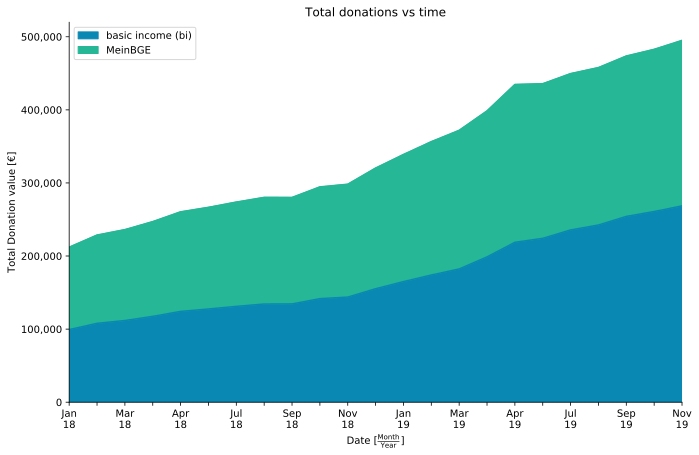

In [8]:
%config InlineBackend.figure_format = 'svg'

fig, ax = plt.subplots(figsize=(11,7))

data_donation_monthly.plot(kind='area', x='Date', 
                           y=['basic income (bi)', 'MeinBGE'], color=['#0888b2', '#26b796'], legend=True,
                           ax=ax)
ax.set_xticks(range(len(data_donation_monthly)))
ax.set_xticklabels(data_donation_monthly['Date'])
plt.setp(ax.get_xticklabels()[1::2], visible=False)
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_title('Total donations vs time')
ax.set_ylabel('Total Donation value [€]')
ax.set_xlabel('Date ' + r'[$\frac{\mathrm{Month}}{\mathrm{Year}}$]')
sns.despine(ax=ax, top=True, right=True)

plt.show()

As the userbase grows more and more people willing to donate join the platform. The resulting growth (the donation value more than doubled since january 2018) leads to more basic incomes per raffle. As the split between basic income and MeinBGE is mostly about 50/50 the organization can also grow and now has more financial tools to make the basic income a more known idea.

- What is the split like over time?

split erklären, events erklären, darauf hinweisen, was die defaulteinstellung ausmacht

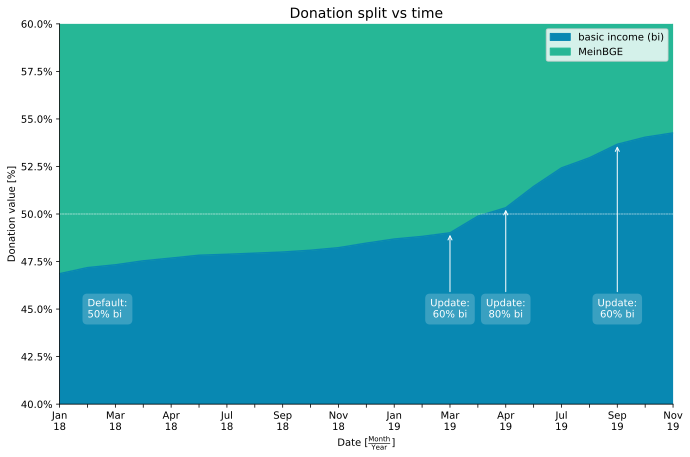

In [9]:
%config InlineBackend.figure_format = 'svg'

fig, ax = plt.subplots(figsize=(11,7))

data_donation_perc = data_donation_monthly[['basic income (bi)', 
                                            'MeinBGE']].divide(data_donation_monthly.sum(axis=1), axis=0)
data_donation_perc['Date'] = data_donation_monthly['Date']

data_donation_perc.plot(kind='area', x='Date', y=['basic income (bi)', 'MeinBGE'], color=['#0888b2', '#26b796'],
                        ax=ax, stacked=True)
ax.set_ylim([0.4, 0.6])
ax.set_xticks(range(len(data_donation_perc)))
ax.set_xticklabels(data_donation_perc['Date'])
plt.setp(ax.get_xticklabels()[1::2], visible=False)
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(str(round(x * 100, 1))) + '%'))
ax.set_title('Donation split vs time', size=14)
ax.set_ylabel('Donation value [%]')
ax.set_xlabel('Date ' + r'[$\frac{\mathrm{Month}}{\mathrm{Year}}$]')
sns.despine(ax=ax, top=True, right=True)
ax.axhline(y=0.5, xmin=ax.get_xticks().min(), xmax=ax.get_xticks().max(),
           linestyle='--', dash_capstyle='round', color='white', linewidth=0.5)

ax.text(x=1, y=0.45, s='Default:\n50% bi', va='center', ha='left', color='white', size=10,
        bbox=dict(facecolor='white', edgecolor='None', alpha=0.2, boxstyle='round,pad=0.5'))

ax.annotate('Update:\n60% bi',
            xy=(data_donation_perc[data_donation_perc['Date'] == 'Mar\n19'].index[0],
                data_donation_perc[data_donation_perc['Date'] == 'Mar\n19'].values[0, 0]), xycoords='data',
            xytext=(data_donation_perc[data_donation_perc['Date'] == 'Mar\n19'].index[0], 0.45),
            textcoords='data', size=10, color='white', va='center', ha='center',
            arrowprops=dict(arrowstyle='->', color='white'),
            bbox=dict(facecolor='white', edgecolor='None', alpha=0.2, boxstyle='round,pad=0.5'),
            horizontalalignment='right', verticalalignment='top',
            )

ax.annotate('Update:\n80% bi',
            xy=(data_donation_perc[data_donation_perc['Date'] == 'Apr\n19'].index[1],
                data_donation_perc[data_donation_perc['Date'] == 'Apr\n19'].values[1, 0]), xycoords='data',
            xytext=(data_donation_perc[data_donation_perc['Date'] == 'Apr\n19'].index[1], 0.45),
            textcoords='data', size=10, color='white', va='center', ha='center',
            arrowprops=dict(arrowstyle='->', color='white'),
            bbox=dict(facecolor='white', edgecolor='None', alpha=0.2, boxstyle='round,pad=0.5'),
            horizontalalignment='right', verticalalignment='top',
            )

ax.annotate('Update:\n60% bi',
            xy=(data_donation_perc[data_donation_perc['Date'] == 'Sep\n19'].index[0],
                data_donation_perc[data_donation_perc['Date'] == 'Sep\n19'].values[0, 0]), xycoords='data',
            xytext=(data_donation_perc[data_donation_perc['Date'] == 'Sep\n19'].index[0], 0.45),
            textcoords='data', size=10, color='white', va='center', ha='center',
            arrowprops=dict(arrowstyle='->', color='white'),
            bbox=dict(facecolor='white', edgecolor='None', alpha=0.2, boxstyle='round,pad=0.5'),
            horizontalalignment='right', verticalalignment='top',
            )
plt.show()

- How much money does the average Crowdhörnchen typically donate monthly?

Users can donate as little a 1€ with no upper limit. This means everybody can give as much as they can afford. 
<i>max,mean,std,median angeben</i>

In [10]:
data_donation_value[['donation_value', 'num_total_donations']].sort_values(by='num_total_donations', 
                                                                           ascending=False).head(10).reset_index(drop=True)

,donation_value,num_total_donations
0,2,458342
1,1,360313
2,5,348767
3,10,174137
4,3,158273
5,6,121524
6,4,114073
7,8,97736
8,7,14396
9,15,8170


- Where does MeinBGE receive its money from? Do they live of small donations or are they financially dependet on big donors?

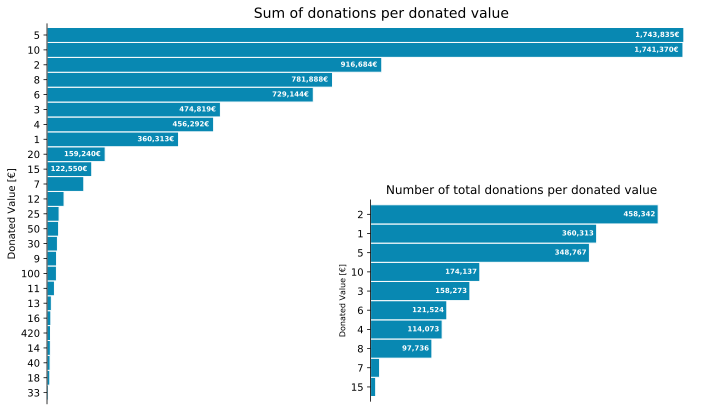

In [11]:
%config InlineBackend.figure_format = 'svg'

fig, ax = plt.subplots(figsize=(12, 7))

data_donation_value[-25:].plot(kind='barh', x='donation_value', y='total_donation_value',
                               color=['#0888b2'], width=1, edgecolor='white',
                               rot=0, ax=ax,
                               legend=False)
sns.despine(top=True, right=True, bottom=True)
ax.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
for count, index in enumerate(data_donation_value[-10:].index):
    ax.text(x=data_donation_value.loc[index, 'total_donation_value']
            - data_donation_value['total_donation_value'].max() * 0.007,
            y=15 + count,
            s='{:,}€'.format(
                data_donation_value.loc[index, 'total_donation_value']),
            va='center', ha='right', color='white', weight='bold', size=7)
ax.set_ylabel('Donated Value [€]')
ax.set_title('Sum of donations per donated value', size=14)

# total number of donations per value as inset graph

inset_data = data_donation_value.sort_values(
    by='num_total_donations', ascending=True).reset_index(drop=True)

# build ax object inside figure 
ax_inset = fig.add_axes([0.5, 0.13, 0.35, 0.4])

# build graph
inset_data[-10:].plot(kind='barh', x='donation_value', y='num_total_donations',
                      color=['#0888b2'], width=1, edgecolor='white',
                      rot=0, ax=ax_inset,
                      legend=False)
sns.despine(top=True, right=True, bottom=True, ax=ax_inset)
ax_inset.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
for count, index in enumerate(inset_data[-8:].index):
    ax_inset.text(x=inset_data.loc[index, 'num_total_donations']
                  - inset_data['num_total_donations'].max() * 0.01,
                  y=2 + count,
                  s='{:,}'.format(
                      inset_data.loc[index, 'num_total_donations']),
                  va='center', ha='right', color='white', weight='bold', size=7)
ax_inset.set_ylabel('Donated Value [€]', size=8)
ax_inset.set_title('Number of total donations per donated value', size=12)
plt.show()

Mein Grundeinkommen e.V. is fortunate enough to have a great amount of small donations every month to fill their needs. This does make them completely independet from external big donors. <br>
Most of the donated value each month consists of $5€$ and $10€$ donations while the most donated values are $2€$, $1€$, and $5€$. 

### Raffles

- How many raffles have there been? Do they have more than one each month?

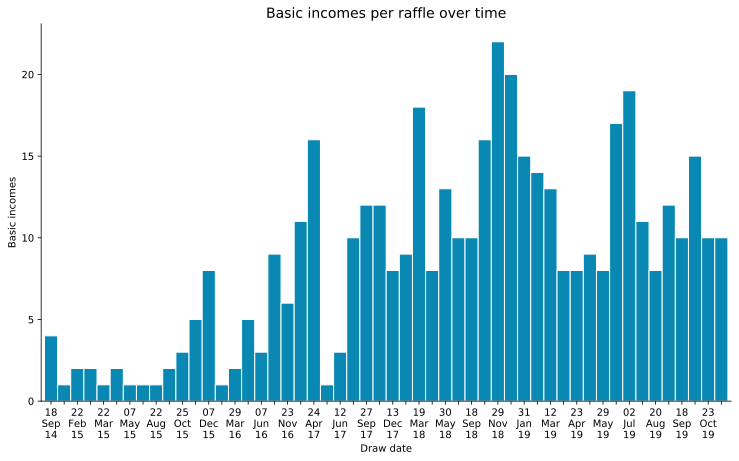

In [12]:
%config InlineBackend.figure_format = 'svg'

fig, ax = plt.subplots(figsize=(12, 7))
raffles_over_time.plot(kind='bar', x='draw_date', y='num_basic_incomes', color='#0888b2',
                       width=1, edgecolor='white', rot=0,
                       legend=False, ax=ax)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.15)
ax.set_ylabel('Basic incomes')
ax.set_xlabel('Draw date')
ax.set_title('Basic incomes per raffle over time', size=14)
plt.setp(ax.get_xticklabels()[1::2], visible=False)
sns.despine(top=True, right=True)

plt.show()

- When does a user become a Crowdhörnchen?

Most of those that eventually become a monthly donor will become so with their sign up. In fact, since 2016 37.4% of all new users created their debit mandate on the date of their sign up, 50.2% did so within the first 30 days of their membership.

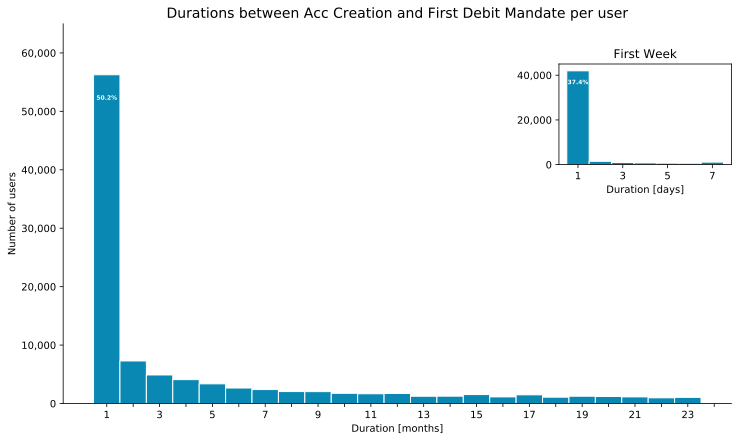

In [34]:
%config InlineBackend.figure_format = 'svg'

fig, ax = plt.subplots(figsize=(12, 7))

first_month_percentage = (duration_til_mandate['phase_duration']/30).astype(int).value_counts(normalize=True).values[0]

ax.set_xticks(np.arange(0, 24) * 30)
ax.hist(x=duration_til_mandate['phase_duration'],
        bins=np.arange(0, 24) * 30,
        color='#0888b2',
        edgecolor='white', align='left')
ax.set_ylim([0, ax.get_ylim()[1] * 1.1])

ax.set_xlabel('Duration [months]')
ax.set_ylabel('Number of users')
ax.set_title('Durations between Acc Creation and First Debit Mandate per user', size= 14)
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks()])
ax.set_xticklabels(['{:,}'.format(int(x/30)+1) for x in ax.get_xticks()])
plt.setp(ax.get_xticklabels()[1::2], visible=False)
ax.annotate(s="{0:.1%}".format(first_month_percentage),
             ha='center', color='white',
             fontweight='bold', fontsize=6,
             xy=(ax.get_xticks()[0], ax.get_ylim()[1] * 0.8))

sns.despine(top=True, right=True, ax=ax)
first_day_percentage = duration_til_mandate['phase_duration'].value_counts(normalize=True).values[0]

# inset plot
ax2 = fig.add_axes([0.7, 0.6, 0.2, 0.2])
ax2.hist(x=duration_til_mandate['phase_duration'],
         bins=[0, 1, 2, 3, 4, 5, 6, 7],
         color='#0888b2',
         edgecolor='white', align='left')
ax2.set_ylim([0, 45000])
ax2.set_xlabel('Duration [days]')
ax2.set_title('First Week')
ax2.annotate(s="{0:.1%}".format(first_day_percentage),
             ha='center', color='white',
             fontweight='bold', fontsize=6,
             xy=(ax2.get_xticks()[1], ax2.get_ylim()[1] * 0.8))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(20000))
ax2.set_yticklabels(ax2.get_yticks().astype(int))
ax2.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.set_yticklabels(['{:,}'.format(int(x)) for x in ax2.get_yticks()])
ax2.set_xticklabels(['{:,}'.format(int(x)+1) for x in ax2.get_xticks()])
plt.show()

Over half (50.8%) of all Crowdhörnchen did not even participate in one raffle before becomming a monthly donor!

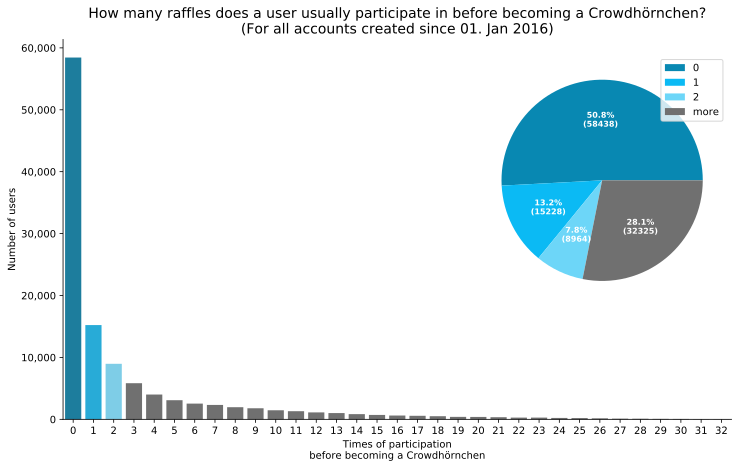

In [14]:
%config InlineBackend.figure_format = 'svg'

fig = plt.figure(figsize=(12,7))
sns.countplot(x='count', data=raffles_before_ch,
              palette=['#0888b2', '#0bbaf4', '#6dd6f8'] + ['#707070'] * (raffles_before_ch['count'].nunique() - 3)
              )
ax = plt.gca()
sns.despine(ax=ax, top=True, right=True)
ax.set_title('How many raffles does a user usually participate in before becoming a Crowdhörnchen?\n'
             '(For all accounts created since 01. Jan 2016)', size=14)
ax.set_xlabel('Times of participation\nbefore becoming a Crowdhörnchen')
ax.set_ylabel('Number of users')
# make number show a space as thousands separater
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x))))

# inset chart to visualize percentages
ax_inset = fig.add_axes([0.5, 0.35, 0.5, 0.5])

#prepare data
raffles_pie = raffles_before_ch['categorie'].value_counts(sort=False).reset_index().sort_values(by='index')

# build pie chart
ax_inset.pie(raffles_pie['categorie'], 
             labels=raffles_pie['index'],
             colors=['#0888b2', '#0bbaf4', '#6dd6f8',  '#707070'],
             autopct=lambda pct: "{:.1f}%\n({:d})".format(pct, int(round(pct / 100. * len(raffles_before_ch), 0))),
             textprops=dict(color='white', weight='bold', size=8))
ax_inset.legend(loc='upper right')
plt.show()

- Wie viel nicht-CH nehmen mehr als einmal teil? (als KPI?)

- Wie viele GE pro Monat?

### Zusätzlich wenn Zeit

- Lebenszyklus User mit mittelwerten
    1. Account-Erstellung
        - mit Dauerauftrag?
    2. Verlosungsteilnahme
        - weitere Teilnahmen?
        - Account löschung?
    3. CH-Sign-Up
        - Wie lange? 
        - Wie viel Teilnahmen an Verlosungen vor Sign-Up?
    4. CH-Sign-Out
        - Zeitdauer bis erneutem CH-Sign-Up?
        - Wie häufig Sign-Up/Sign-Out?
    5. Account Löschung
        - Wie viele Menschen löschen Account?

- Wann werden Newsletter akzeptiert?

- Wünsche:
    - Was steht im Wunsch? --> Bag of Words (häufigste Wortkombination aus 2-3 Worten)
    - Welche Wünsche werden am meisten geliked? (Auch auf Website dargestellt)

- Kommentare auf Website-Magazin/Blogposts:
    - Sentiment-Analyse
